# Data Analysis and Visualization with Temperature and Humidity

### Data Analysis

1.  **Exploratory Data Analysis (EDA):**
    
    *   **Trend Analysis:** Examine how each variable changes over time.
    *   **Seasonality Analysis:** Identify repeating patterns or cycles in the data.
    *   **Correlation Analysis:** Investigate the relationship between pairs of variables (e.g., Temperature vs. CO2 concentration).
2.  **Statistical Analysis:**
    
    *   **Descriptive Statistics:** Calculate mean, median, variance, etc., for each variable.
    *   **Distribution Analysis:** Analyze the distribution of each variable using histograms or kernel density estimations.
    *   **Hypothesis Testing:** Test hypotheses about the relationships between variables (e.g., Pearson's correlation, Spearman's rank correlation).
3.  **Visualization:**
    
    *   **Time Series Plot:** Plot each variable over time to visualize trends and patterns.
    *   **Heatmaps:** Use heatmaps to visualize correlations between variables.
    *   **Box Plots and Violin Plots:** To visualize the distribution and outliers in the data.

### Data Prediction

1.  **Time Series Forecasting:**
    
    *   **ARIMA (AutoRegressive Integrated Moving Average):** For forecasting future values of each variable based on its own past values.
    *   **SARIMA (Seasonal ARIMA):** An extension of ARIMA that supports univariate time series data with a seasonal component.
    *   **Prophet:** Developed by Facebook, it's useful for forecasting with daily observations that display patterns on different time scales.
2.  **Machine Learning Models:**
    
    *   **Regression Models:** Linear Regression, Polynomial Regression for predicting continuous values.
    *   **Random Forest and Gradient Boosting Machines (GBM):** For capturing non-linear relationships in the data.
    *   **Neural Networks:** LSTM (Long Short-Term Memory) networks are especially good for sequences like time series.
3.  **Multivariate Time Series Forecasting:**
    
    *   **Vector AutoRegression (VAR):** Models the relationship between multiple variables and their lagged values.
    *   **Multivariate LSTM:** A deep learning approach to handle multiple inputs for forecasting.
4.  **Evaluation:**
    
    *   Use metrics like MAE (Mean Absolute Error), RMSE (Root Mean Square Error), and MAPE (Mean Absolute Percentage Error) to evaluate the performance of your forecasting models.

### Tools and Libraries

*   **Pandas:** For data manipulation and analysis.
*   **NumPy:** For numerical computations.
*   **Matplotlib** and **Seaborn:** For data visualization.
*   **Statsmodels:** For implementing statistical models.
*   **Scikit-learn:** For machine learning models.
*   **TensorFlow** or **Keras:** For deep learning models.

### Steps to Get Started

1.  **Preprocess the Data:** Clean the data by handling missing values, outliers, and normalizing or standardizing the values if necessary.
2.  **Perform EDA:** Use visualization and statistical analysis to understand the data.
3.  **Model Selection:** Based on EDA, choose appropriate models for forecasting.
4.  **Model Training:** Train the model on historical data.
5.  **Model Evaluation:** Evaluate the model's performance using appropriate metrics.
6.  **Forecasting:** Use the model to make predictions.

In [12]:
!pip install pandas Pyarrow

You should consider upgrading via the 'D:\soch1\Projects\IoT_course\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [13]:
import pandas as pd

# Create a DataFrame with ten records
data = {
    'Temperature': [20, 21, 19, 22, 21, 20, 23, 24, 22, 21],
    'Humidity': [30, 32, 31, 33, 32, 31, 34, 35, 33, 32]
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('data_tst.csv', index=False)

# Read the CSV file into a DataFrame
df = pd.read_csv('data_tst.csv')

# Display the DataFrame
df

,Temperature,Humidity
0,20,30
1,21,32
2,19,31
3,22,33
4,21,32
5,20,31
6,23,34
7,24,35
8,22,33
9,21,32


### This data represents the indoor air quality at different times, with temperature in °C, humidity in %, CO2 in ppm (parts per million), and TVOC (Total Volatile Organic Compounds) in ppb (parts per billion). All values are within the recommended ranges for good indoor air quality. Please note that the CO2 and TVOC values are hypothetical and may not represent typical indoor levels

In [14]:
# Load the data
df = pd.read_csv('latest_telemetry.csv')

df

,Last update time,Key,Value
0,20/02/2024 10:44,CO2,403.0
1,20/02/2024 10:44,Humidity,44.0
2,20/02/2024 10:44,TVOC,0.0
3,20/02/2024 10:44,Temperature,20.5


In [15]:
# Pivot the DataFrame
df_pivot = df.pivot(index='Last update time', columns='Key', values='Value')

# Reset the index
df_pivot.reset_index(inplace=True)

# Save the transformed data
df_pivot.head()

Key,Last update time,CO2,Humidity,TVOC,Temperature
0,20/02/2024 10:44,403.0,44.0,0.0,20.5


In [16]:
def transform_data(latest_telemetry_file, data_file):
    # Load the existing data
    df_data = pd.read_csv(data_file)

    # Load the new data
    df_latest = pd.read_csv(latest_telemetry_file)

    # Pivot the new DataFrame
    df_latest_pivot = df_latest.pivot(index='Lastupdatetime', columns='Key', values='Value')

    # Reset the index
    df_latest_pivot.reset_index(inplace=True)

    # Append the new data to the existing data
    df_combined = pd.concat([df_data, df_latest_pivot])

    return df_combined

In [17]:
def save_data(df, data_file):
    # Save the combined data
    df.to_csv(data_file, index=False)

In [18]:
#  check if .csv exists before trying to read it. If it doesn’t exist, it will create an empty DataFrame and save it as .csv
import os

def transform_data(latest_telemetry_file, data_file):
    # Check if data_file exists
    if os.path.exists(data_file):
        # Load the existing data
        df_data = pd.read_csv(data_file)
    else:
        # Create an empty DataFrame with the required columns
        df_data = pd.DataFrame(columns=['Lastupdatetime', 'Temperature', 'Humidity', 'CO2', 'TVOC'])

    # Load the new data
    df_latest = pd.read_csv(latest_telemetry_file)

    df_latest = df_latest.rename(columns={'Last update time': 'Lastupdatetime'})

    # Pivot the new DataFrame
    df_latest_pivot = df_latest.pivot(index='Lastupdatetime', columns='Key', values='Value')

    # Reset the index
    df_latest_pivot.reset_index(inplace=True)

    # Append the new data to the existing data
    df_combined = pd.concat([df_data, df_latest_pivot])

    return df_combined

## Main Function

In [19]:
latest_telemetry_file = 'latest_telemetry.csv'
data_file = 'data01.csv'


In [20]:
# Unccomment when new data are available
# df_combined = transform_data(latest_telemetry_file, data_file)
# save_data(df_combined, data_file)

In [21]:
aq = pd.read_csv('data01.csv')
aq.tail()

,Lastupdatetime,Temperature,Humidity,CO2,TVOC
1552,02/03/2024 05:04,20.5,58.2,409.0,0.0
1553,03/03/2024 05:14,20.5,58.6,409.5,0.0
1554,03/03/2024 05:24,20.5,44.0,403.0,0.0
1555,03/03/2024 05:34,20.0,54.0,402.0,0.0
1556,03/03/2024 05:44,21.5,44.0,403.0,0.0


In [22]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lastupdatetime  1557 non-null   object 
 1   Temperature     1557 non-null   float64
 2   Humidity        1557 non-null   float64
 3   CO2             1557 non-null   float64
 4   TVOC            1557 non-null   float64
dtypes: float64(4), object(1)
memory usage: 60.9+ KB


## Plot Simple Graphs

In [23]:
import matplotlib.pyplot as plt

In [24]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Temperature (°C)')

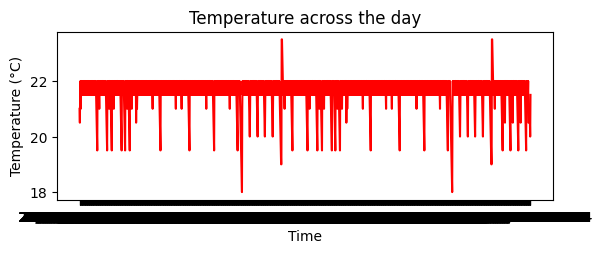

In [25]:
# Temperature graph
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(aq['Lastupdatetime'], aq['Temperature'], color='red')
plt.title('Temperature across the day')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')

In [26]:
plt.show()

In [27]:
from datetime import datetime, timedelta

# Get the current time
now = datetime.now()

# Calculate the time 24 hours ago
one_day_ago = now - timedelta(days=1)

# Convert 'Lastupdatetime' to datetime format
#aq['Lastupdatetime'] = pd.to_datetime(aq['Lastupdatetime'])
aq['Lastupdatetime'] = pd.to_datetime(aq['Lastupdatetime'], format='%d/%m/%Y %H:%M')

# Filter the DataFrame to only include data from the last 24 hours
aq_last_24_hours = aq[aq['Lastupdatetime'] >= one_day_ago]


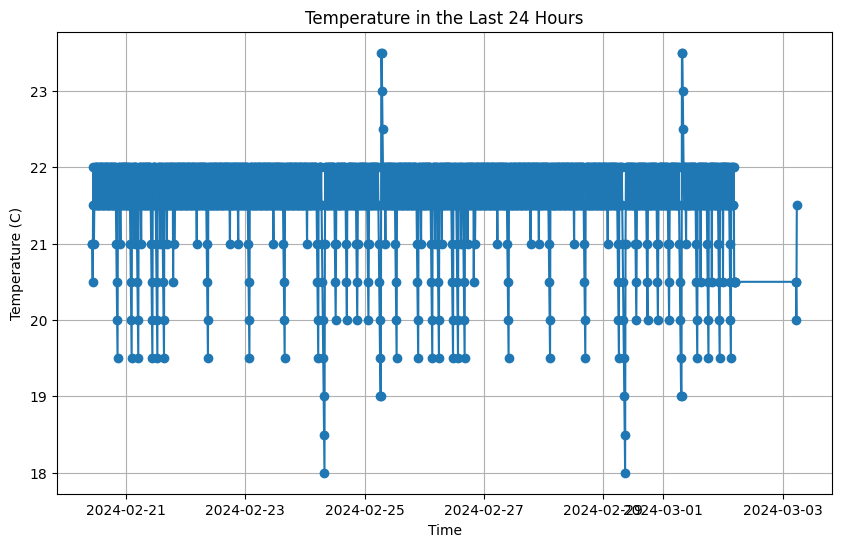

In [28]:
# Plot the temperature data
plt.figure(figsize=(10, 6))
plt.plot(aq_last_24_hours['Lastupdatetime'], aq_last_24_hours['Temperature'], marker='o')
plt.title('Temperature in the Last 24 Hours')
plt.xlabel('Time')
plt.ylabel('Temperature (C)')
plt.grid(True)
plt.show()

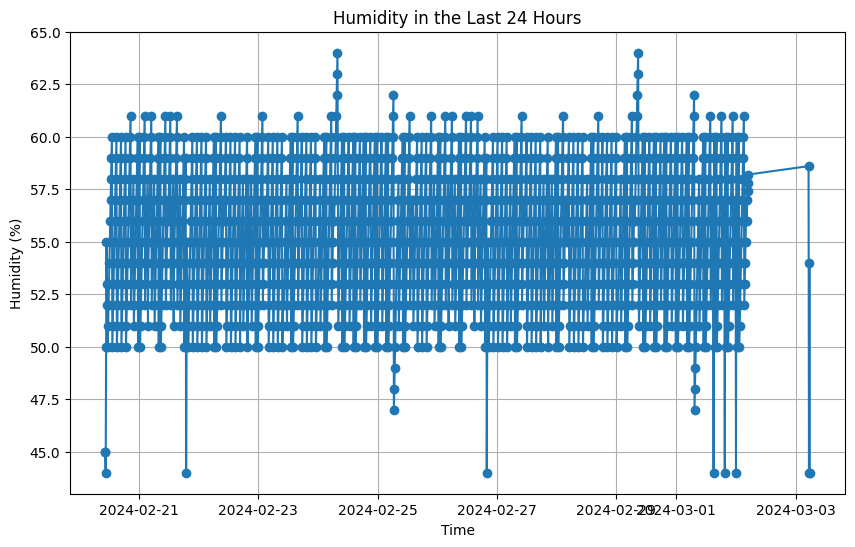

In [29]:
# Plot the humidity data
plt.figure(figsize=(10, 6))
plt.plot(aq_last_24_hours['Lastupdatetime'], aq_last_24_hours['Humidity'], marker='o')
plt.title('Humidity in the Last 24 Hours')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()


1.  **Exploratory Data Analysis (EDA):**
    
    *   **Trend Analysis:** Examine how each variable changes over time.
    *   **Seasonality Analysis:** Identify repeating patterns or cycles in the data.
    *   **Correlation Analysis:** Investigate the relationship between pairs of variables (e.g., Temperature vs. CO2 concentration).

### 1\. Trend Analysis

This function will plot each variable over time to examine how they change.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_trend_analysis(filename):
    df = pd.read_csv(filename, parse_dates=['Lastupdatetime'], dayfirst=True)
    df.set_index('Lastupdatetime', inplace=True)
    
    fig, ax = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
    df['Temperature'].plot(ax=ax[0], title='Temperature Trend')
    df['Humidity'].plot(ax=ax[1], title='Humidity Trend')
    df['CO2'].plot(ax=ax[2], title='CO2 Concentration Trend')
    
    for a in ax:
        a.set_ylabel('Value')
    plt.xlabel('Time')
    plt.tight_layout()
    plt.show()

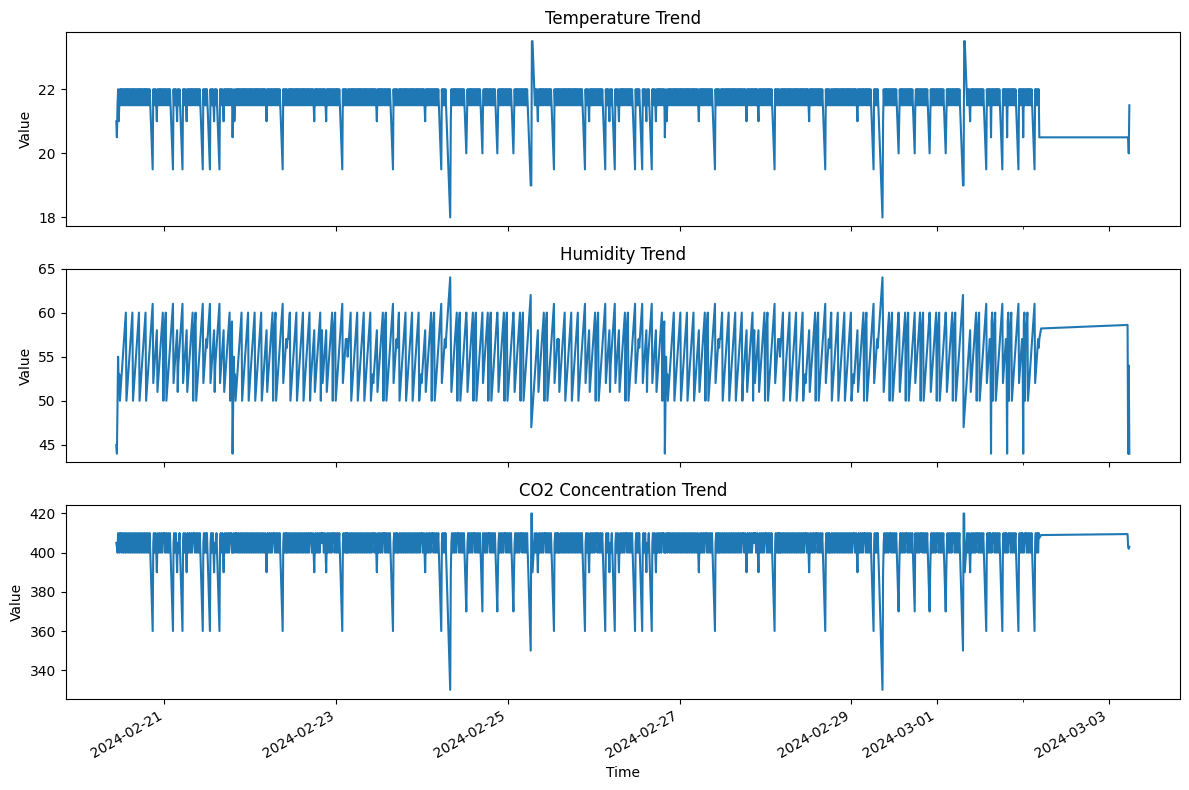

In [32]:
plot_trend_analysis('data01.csv')

### 2\. Seasonality Analysis

This function will help identify repeating patterns or cycles in the data, using autocorrelation plots.

In [33]:
from pandas.plotting import autocorrelation_plot

def plot_seasonality_analysis(filename, column):
    df = pd.read_csv(filename, parse_dates=['Lastupdatetime'], dayfirst=True)
    plt.figure(figsize=(12, 6))
    autocorrelation_plot(df[column])
    plt.title(f'Seasonality Analysis of {column}')
    plt.show()


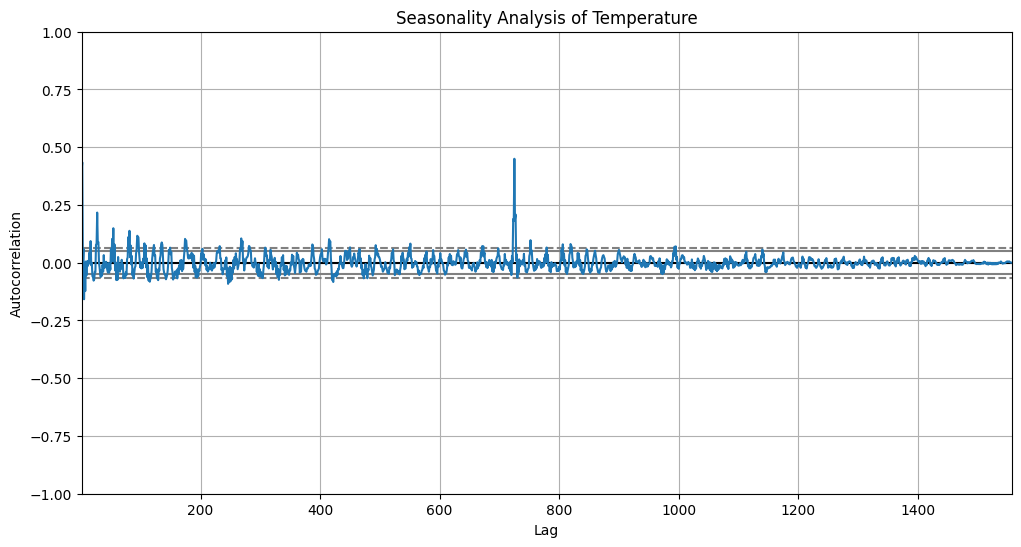

In [34]:
plot_seasonality_analysis('data01.csv', 'Temperature')

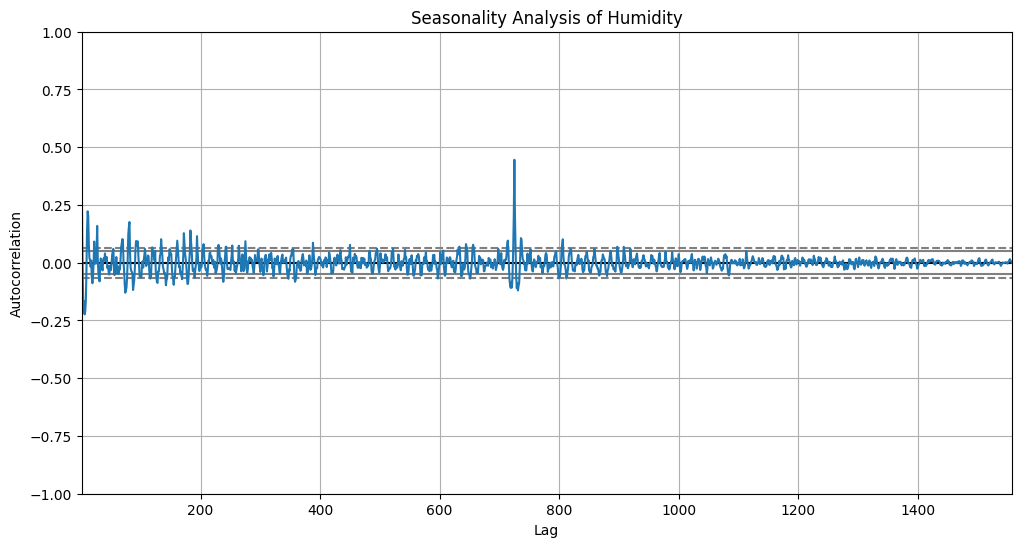

In [36]:
plot_seasonality_analysis('data01.csv', 'Humidity')

### 3\. Correlation Analysis

This function will compute and visualize the correlation matrix between pairs of variables.

In [ ]:
# Code to check if seaborn is installed and install it via pip if it is not installed
import subprocess
import pkg_resources
import sys

def install_package(package_name):
    try:
        # Check if the package is already installed
        pkg_resources.get_distribution(package_name)
        print(f"{package_name} is already installed.")
    except pkg_resources.DistributionNotFound:
        # If the package is not installed, install it using pip
        print(f"{package_name} is not installed, installing now...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
        print(f"{package_name} has been successfully installed.")


In [ ]:
# Replace 'seaborn' with any package you want to check and install
install_package('seaborn')

In [ ]:
import seaborn as sns

def plot_correlation_analysis(filename):
    df = pd.read_csv(filename)
    correlation_matrix = df.drop('Lastupdatetime', axis=1).corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title('Correlation Analysis')
    plt.show()
